In [18]:
import matplotlib.pyplot as plt
import imageio
import numpy as np
import copy
from skimage.transform import resize
image1 = imageio.imread('cryptoPic.png')
plt.figure(figsize = (15,15))
print (image1.shape)
image2 = image1

(731, 860, 4)


<Figure size 1080x1080 with 0 Axes>

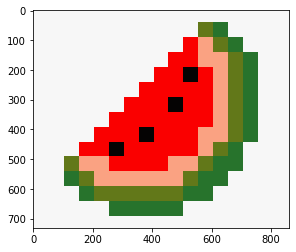

In [19]:
plt.imshow(image1)

In [90]:
# This was a method to Generate a key matrix of Random Numbers
# a = np.arange(256)
# np.random.shuffle(a)
# key =[]
# row = []
# t=0
# for i in range(16):
#     for j in range(16):
#         row.append(a[t])
#         t+=1
#     key.append(row)
#     row = []

# print (key)
        

(2400, 2038, 4)
256
[[0, 1, 102, 153, 51, 5, 137, 149, 68, 41, 128, 200, 150, 248, 127, 67], [255, 66, 218, 85, 170, 43, 12, 6, 142, 74, 52, 129, 204, 250, 220, 109], [146, 73, 14, 135, 152, 64, 72, 216, 148, 251, 219, 2, 69, 81, 217, 253], [151, 225, 57, 18, 36, 7, 131, 60, 107, 227, 3, 96, 8, 126, 231, 254], [20, 113, 9, 147, 236, 229, 162, 70, 22, 130, 235, 233, 143, 163, 61, 25], [238, 232, 145, 62, 33, 237, 58, 35, 93, 11, 155, 154, 38, 116, 241, 239], [240, 122, 48, 125, 65, 242, 56, 134, 49, 132, 156, 44, 63, 106, 124, 100], [133, 75, 224, 209, 252, 4, 34, 196, 199, 28, 197, 249, 175, 158, 21, 186], [247, 144, 191, 98, 13, 174, 244, 29, 119, 234, 221, 189, 136, 120, 115, 138], [59, 112, 110, 55, 108, 54, 104, 53, 111, 139, 121, 206, 105, 50, 95, 123], [47, 46, 92, 90, 91, 45, 117, 141, 245, 31, 140, 99, 94, 103, 159, 167], [114, 42, 88, 97, 118, 89, 164, 190, 101, 84, 40, 212, 80, 16, 86, 30], [71, 76, 87, 24, 15, 77, 82, 222, 26, 17, 32, 79, 203, 83, 23, 37], [78, 243, 39, 195,

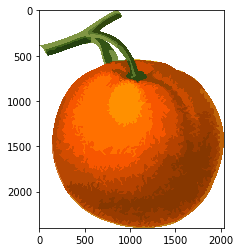

In [91]:
# method to generate keyMatrix from another image
keyImage = imageio.imread('imageforkey.png')
print(keyImage.shape)
plt.imshow(keyImage)
keyImageArray = []
for i in keyImage:
    for j in i:
        for t in j:
            if t not in keyImageArray:
                keyImageArray.append(t)
print (len(keyImageArray))
temp = 0
keyImageMatrix=[]
for i in range(16):
    tarray = []
    for j in range(16):
        tarray.append(keyImageArray[temp])
        temp+=1
    keyImageMatrix.append(tarray)
print (keyImageMatrix)
key = keyImageMatrix

In [92]:
def Find_index(item,L):
    for i in L:
        if item in i:
            return L.index(i) , i.index(item)
    return(-1)

def ret_row(item,L):
    for i in L:
        return

def encrypt(a,b,Matrix):
    crypt = []
    L1 = Find_index(int(a),Matrix)
    L2 = Find_index(int(b),Matrix)
    if L1[0] == L2[0] :
        crypt.append( Matrix[L1[0]][(L1[1]+1)%16]) 
        crypt.append(Matrix[L2[0]][(L2[1]+1)%16])
    elif L1[1] == L2[1] :
        crypt.append(Matrix[(L1[0]+1)%16][L1[1]] )
        crypt.append(Matrix[(L2[0]+1)%16][L2[1]])
    else:
        crypt.append(Matrix[L1[0]][L2[1]])
        crypt.append(Matrix[L2[0]][L1[1]])
    return crypt
print (len(image1))
print (len(image1[0]))
print (len(image1[0][0]))

731
860
4


In [93]:

crypt= copy.copy(image2)
for i in range(0,len(image2)):
    for j in range(0,int(len(image2[i])/2)):
        n = len(image2[i]) - j -1
        temp=[]
        for t in range (0,int(len(image2[i][j]))):
            msg = encrypt(image2[i][j][t],image2[i][n][t],key)
            crypt[i][j][t] = msg[0]
            crypt[i][n][t] = msg[1]
            
            
        
        
        

(731, 860, 4)


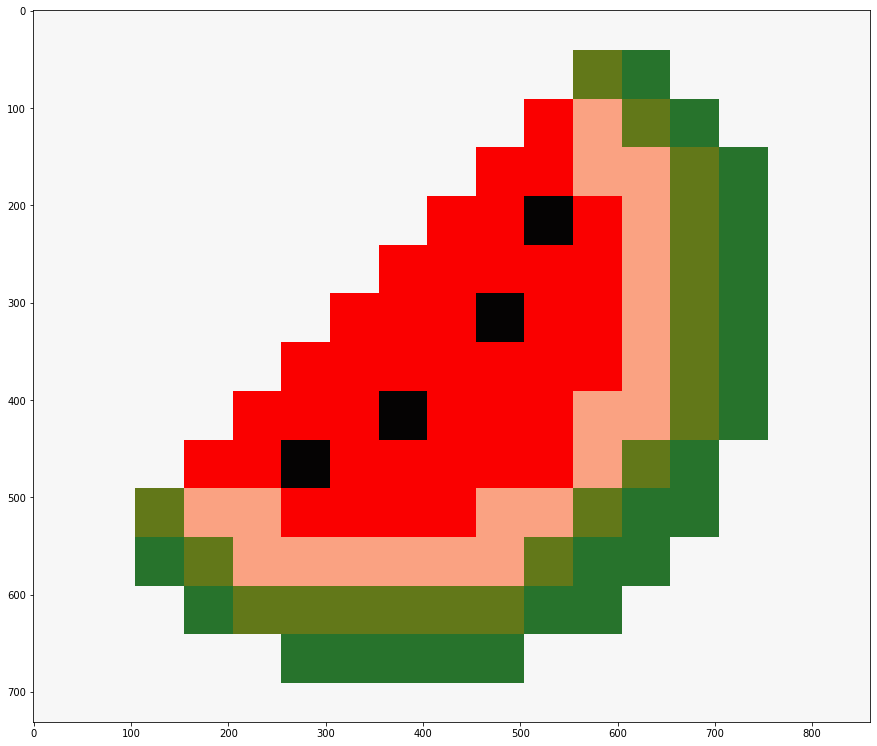

In [94]:
plt.figure(figsize = (15,15))
print(image1.shape)
plt.imshow(image1)


(731, 860, 4)


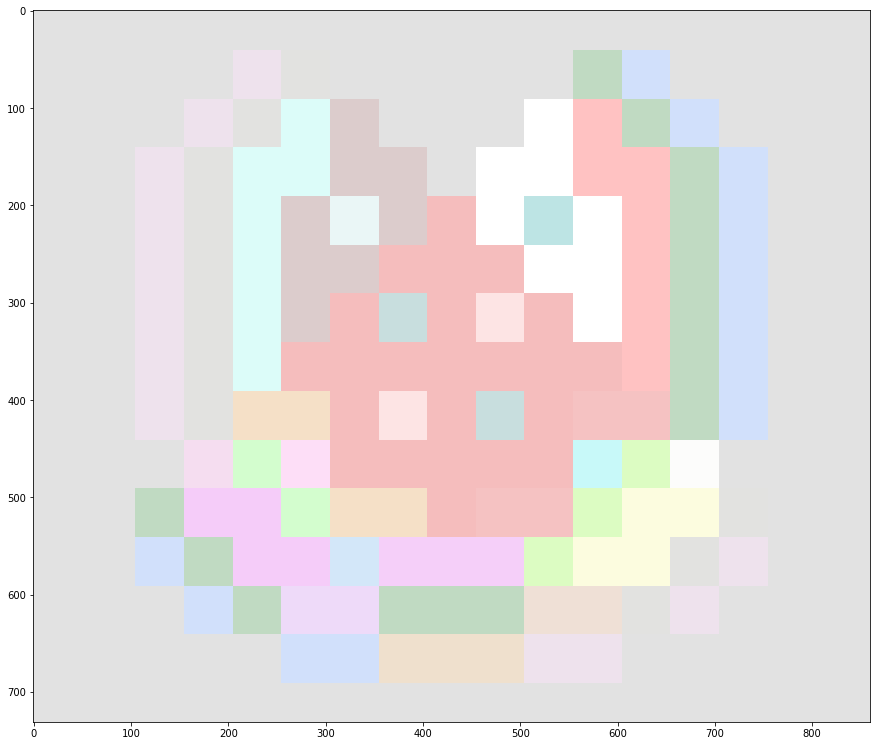

In [95]:
plt.figure(figsize = (15,15))
print(crypt.shape)

plt.imshow(crypt)

In [96]:
decrypt= image2

def Decrypt(a,b,Matrix):
    crypt = []
    L1 = Find_index(int(a),Matrix)
    L2 = Find_index(int(b),Matrix)
    if L1[0] == L2[0] :
        crypt.append( Matrix[L1[0]][(L1[1]-1)%16]) 
        crypt.append(Matrix[L2[0]][(L2[1]-1)%16])
    elif L1[1] == L2[1] :
        crypt.append(Matrix[(L1[0]-1)%16][L1[1]] )
        crypt.append(Matrix[(L2[0]-1)%16][L2[1]])
    else:
        crypt.append(Matrix[L1[0]][L2[1]])
        crypt.append(Matrix[L2[0]][L1[1]])
    return crypt


for i in range(0,len(crypt)):
    for j in range(0,int(len(crypt[i])/2)):
        n = len(crypt[i]) - j -1
        temp=[]
        for t in range (0,int(len(crypt[i][j]))):
            msg = Decrypt(crypt[i][j][t],crypt[i][n][t],key)
            decrypt[i][j][t] = msg[0]
            decrypt[i][n][t] = msg[1]

(731, 860, 4)


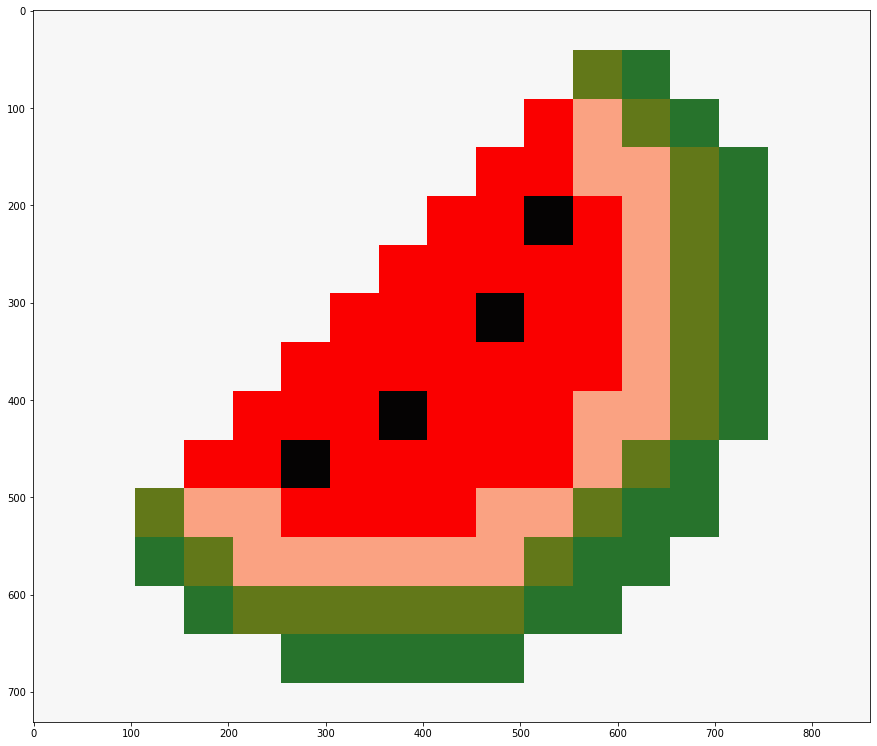

In [97]:
plt.figure(figsize = (15,15))
print(decrypt.shape)

plt.imshow(decrypt)

In [98]:
imageio.imsave('originalImage.png',image2)
imageio.imsave('encryptedImage.png',crypt)
imageio.imsave('decryptedImage.png',decrypt)

(2400, 2038, 4)


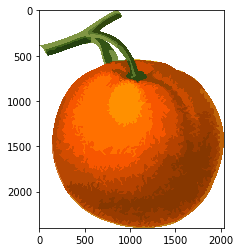

In [99]:
# keyImage = imageio.imread('imageforkey.png')
# print(keyImage.shape)
# plt.imshow(keyImage)

In [101]:
# keyImageArray = []
# for i in keyImage:
#     for j in i:
#         for t in j:
#             if t not in keyImageArray:
#                 keyImageArray.append(t)
# print (len(keyImageArray))

In [102]:
# temp = 0
# keyImageMatrix=[]
# for i in range(16):
#     tarray = []
#     for j in range(16):
#         tarray.append(keyImageArray[temp])
#         temp+=1
#     keyImageMatrix.append(tarray)
# print (keyImageMatrix)

In [15]:
keyImage = imageio.imread('imageforkey.png')


In [16]:
print (keyImage)

[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 ...

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  ...
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]
